In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Read data from csv 

In [39]:
df = pd.read_csv('car data.csv')

In [40]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Checking datatypes and total entries

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [42]:
df.isnull().sum()
#Checking total null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [43]:
import datetime

In [44]:
date_time = datetime.datetime.now()

In [45]:
df['Age']=date_time.year-df['Year']

In [46]:
df=df.drop(columns = 'Year')

In [47]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


Encoding object datatype

In [48]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [49]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':1, 'Diesel':2, 'CNG':3})

In [50]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [51]:
df['Transmission'] = df['Transmission'].map({'Manual':1, 'Automatic':2})

In [52]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [53]:
df['Seller_Type'] =df['Seller_Type'].map({'Dealer':1, 'Individual':2})

In [54]:
df = df.drop(columns='Car_Name')

In [55]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,1,1,1,0,10
1,4.75,9.54,43000,2,1,1,0,11
2,7.25,9.85,6900,1,1,1,0,7
3,2.85,4.15,5200,1,1,1,0,13
4,4.60,6.87,42450,2,1,1,0,10


In [56]:
x=df.drop(columns='Selling_Price')
y=df['Selling_Price']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [58]:
x_train,xtest,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
sf = RandomForestRegressor()

In [60]:
lr_model = lr.fit(x_train,y_train)
dt_model = dt.fit(x_train,y_train)
rf_model = sf.fit(x_train,y_train)

In [61]:
lr_pred = lr_model.predict(xtest)
dt_pred = dt_model.predict(xtest)
rf_pred = rf_model.predict(xtest)

In [62]:
lr_auc = r2_score(y_test,lr_pred)
dt_auc = r2_score(y_test,dt_pred)
rf_auc = r2_score(y_test,rf_pred)

In [63]:
print(lr_auc)
print(dt_auc)
print(rf_auc)

0.8468053957657442
0.9570496296990237
0.9590075410877694


In [64]:
ya = [lr_auc,dt_auc,rf_auc]
xa = {'lr_auc':lr_auc,'dt_auc':dt_auc,'rf_auc':rf_auc}

<Axes: >

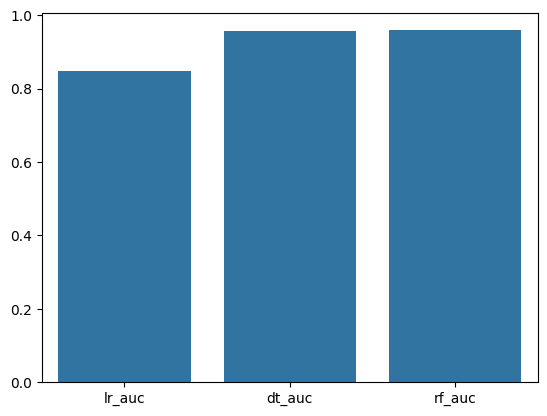

In [65]:
sns.barplot(xa)

In [66]:
fm = rf_model.fit(x,y)

In [67]:
import joblib

In [68]:
joblib.dump(fm,'Second_Hand_Car_price_ml')

['Second_Hand_Car_price_ml']

In [78]:
from tkinter import *
import joblib

def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    
    model = joblib.load('Second_Hand_Car_price_ml')
    data_new = pd.DataFrame({
        'Present_Price':p1,
        'Kms_Driven':p2,
        'Fuel_Type':p3,
        'Seller_Type':p4,
        'Transmission':p5,
        'Owner':p6,
        'Age':p7
    },index=[0])
    result=model.predict(data_new)
    Label(master, text="Car Purchase amount").grid(row=8)
    Label(master, text=result).grid(row=10)
    print("Car Purchase amount", result[0])
    
master = Tk()
master.title("Car Price Prediction Using Machine Learning")
label = Label(master, text = "Car Price Prediction Using Machine Learning"
                          , bg = "black", fg = "white",padx=10,pady=10). \
                               grid(row=0,columnspan=2)


Label(master, text="Present_Price").grid(row=1)
Label(master, text="Kms_Driven").grid(row=2)
Label(master, text="Fuel_Type").grid(row=3)
Label(master, text="Seller_Type").grid(row=4)
Label(master, text="Transmission").grid(row=5)
Label(master, text="Owner").grid(row=6)
Label(master, text="Age").grid(row=7)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()